In [1]:
#importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer  
from src.utils import center_based_clustering_algorithms as CBC

In [2]:
# Reading data as dataframe
data = pd.read_csv('../data/featsel/data_scaled_minmax.csv')
data

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,age,...,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,1.0,0.966667,1.0
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.433333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0


## Dimentioality Reduction
- Using PCA to reduce the original number of feature to 2, generates only 2 components, So we can plot the data. 

In [3]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_model = PCA(n_components=2, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_model.fit_transform(data)
#reduce the dimentions of the centroids 
pca_data.shape
# define "components_df" that include the valuse for the components after reducing the dimentions 
two_components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )

##### Using the elbow method to find the best value for K, trying K-means++ using the original dataset

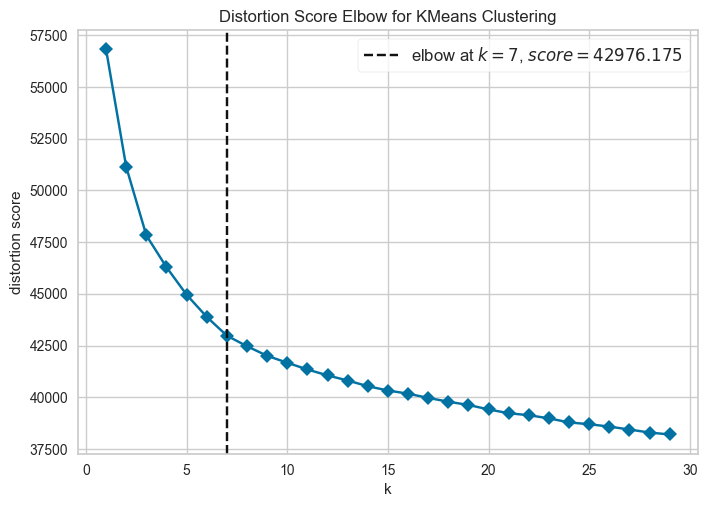

In [4]:
K_means_model = KMeans(n_init = 300)
potential_k_list = list(range(1, 30))
CBC.plot_elbow(data, K_means_model, potential_k_list)

##### `From the plot above, a value between around 4 - 7 could be a good value for k`

### Using the elbow method to find the best value for K, trying K-means++ using data after the dimensioality reduction
Note: Distortion is the sum of squared error

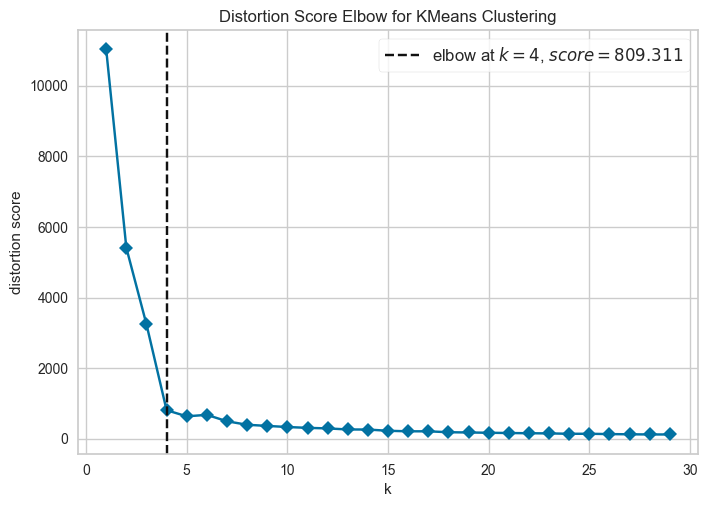

In [5]:
K_means_model_ = KMeans(n_init = "auto") 
CBC.plot_elbow(two_components_df, K_means_model_, potential_k_list) 

##### `From the plot above, a value 4 could be a good value for k`

### Plot the silhouette plot for K-means++ trying different values for k using the original dataset

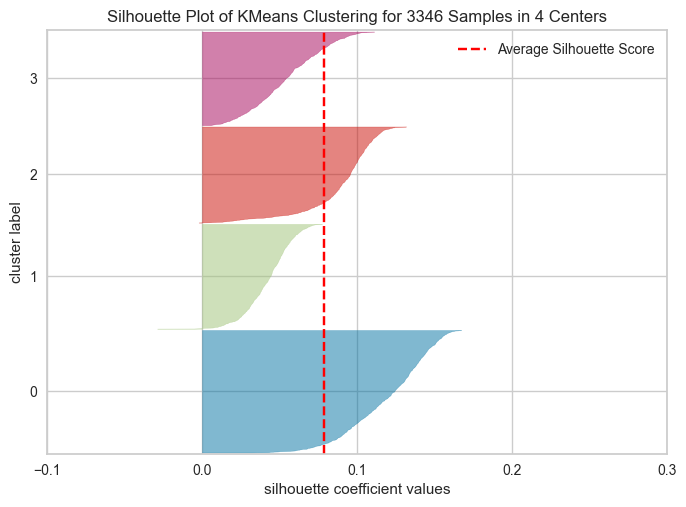

In [6]:
CBC.plot_silhouette(4, KMeans, data) 

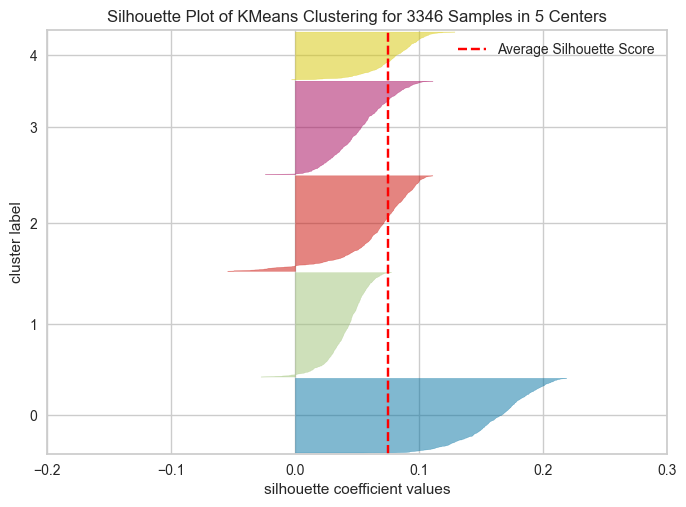

In [7]:
CBC.plot_silhouette(5, KMeans, data)

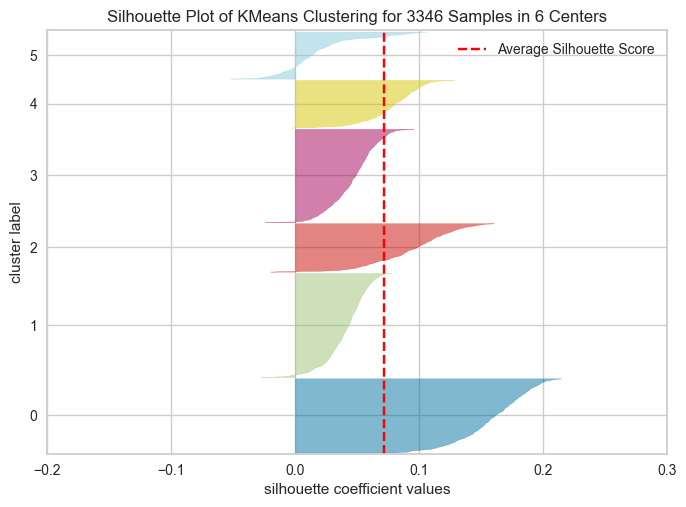

In [8]:
CBC.plot_silhouette(6, KMeans, data)

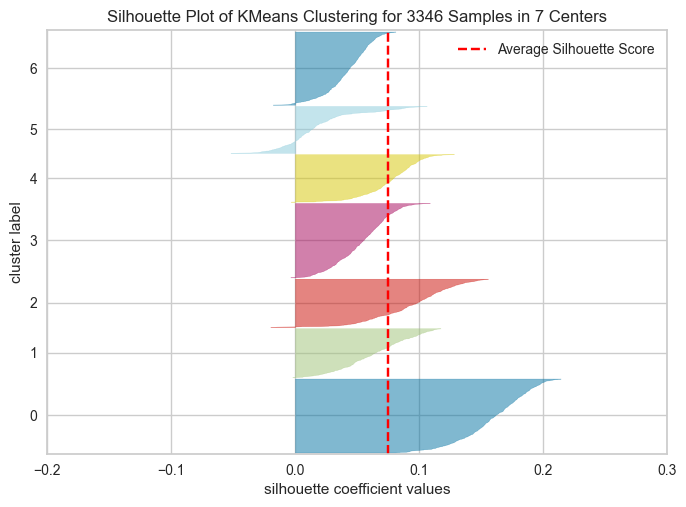

In [9]:
CBC.plot_silhouette(7, KMeans, data)

### Plot the silhouette plot for K-means++ trying different values for k using the data after reduce its dimentions

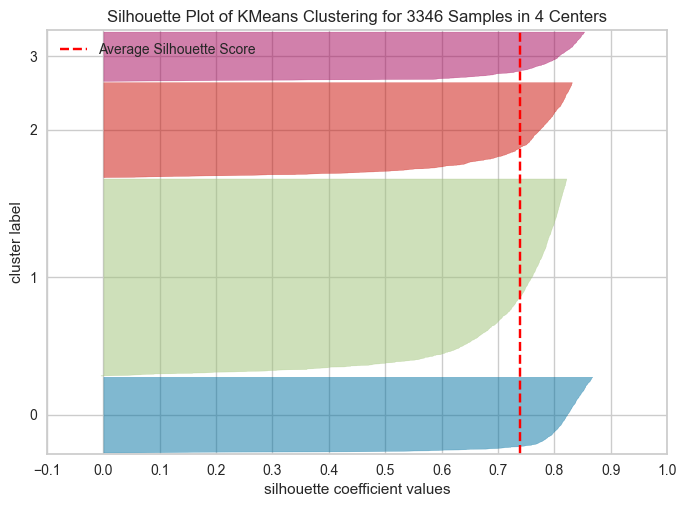

In [10]:
CBC.plot_silhouette(4, KMeans, two_components_df)

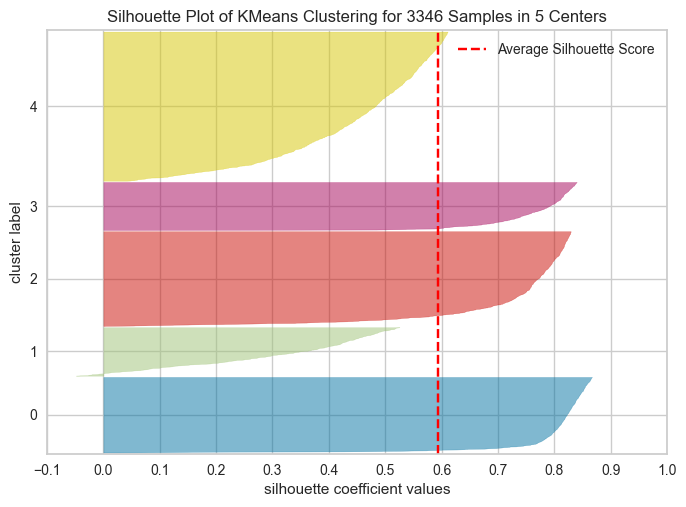

In [11]:
CBC.plot_silhouette(5, KMeans, two_components_df)

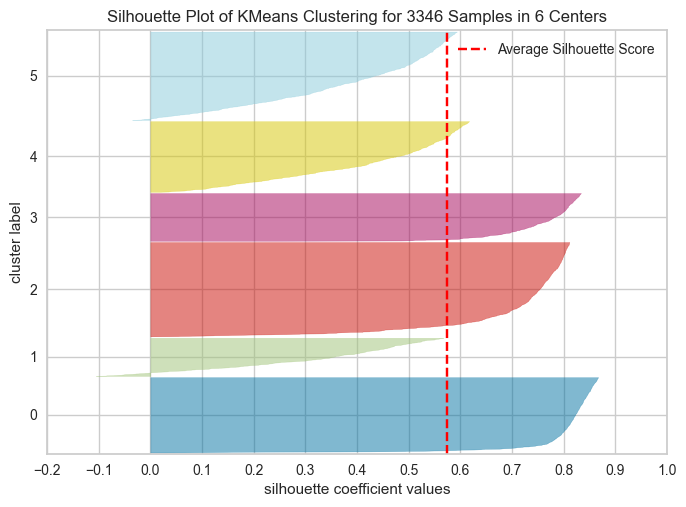

In [12]:
CBC.plot_silhouette(6, KMeans, two_components_df)

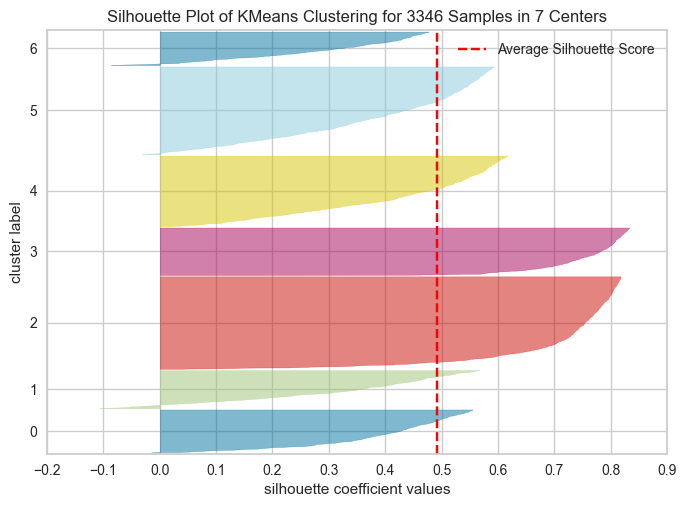

In [13]:
CBC.plot_silhouette(7, KMeans, two_components_df)

##### Using the elbow method to find the best value for K, trying K-medoids using the original dataset

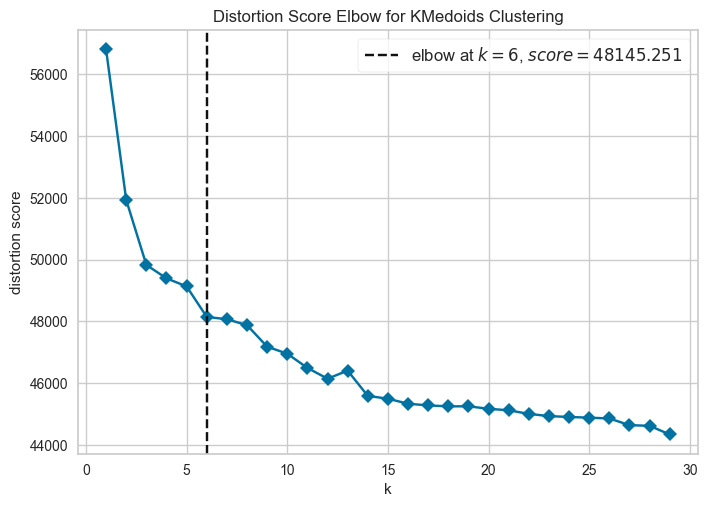

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Instantiate the clustering model and visualizer
K_medoids_model_ = KMedoids()
K_medoids_visualizer_original_data = KElbowVisualizer(K_medoids_model_, k=(1,30), timings=False)
K_medoids_visualizer_original_data.fit(data)# Fit the data to the visualizer
K_medoids_visualizer_original_data.show()# Finalize and render the figure

#### Using the elbow method to find the best value for K, trying K-medoids using data after the dimensioality reduction

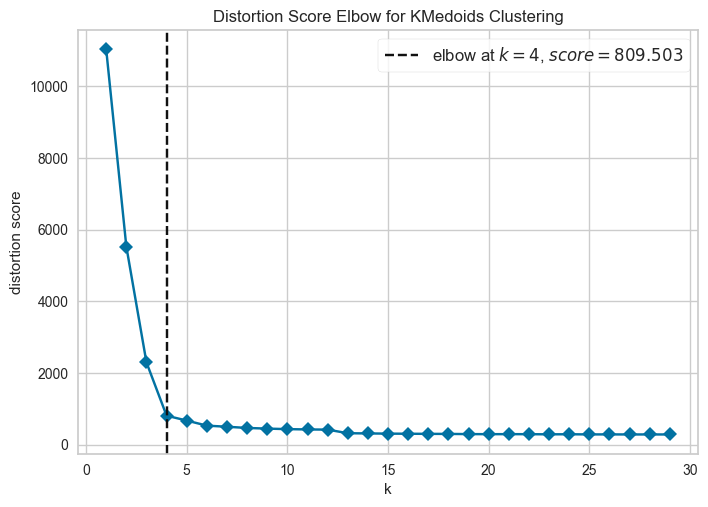

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Instantiate the clustering model and visualizer
K_medoids_model = KMedoids()
K_medoids_visualizer_reduced_data = KElbowVisualizer(K_medoids_model, k=(1,30), timings=False)
K_medoids_visualizer_reduced_data.fit(two_components_df)# Fit the data to the visualizer
K_medoids_visualizer_reduced_data.show()# Finalize and render the figure

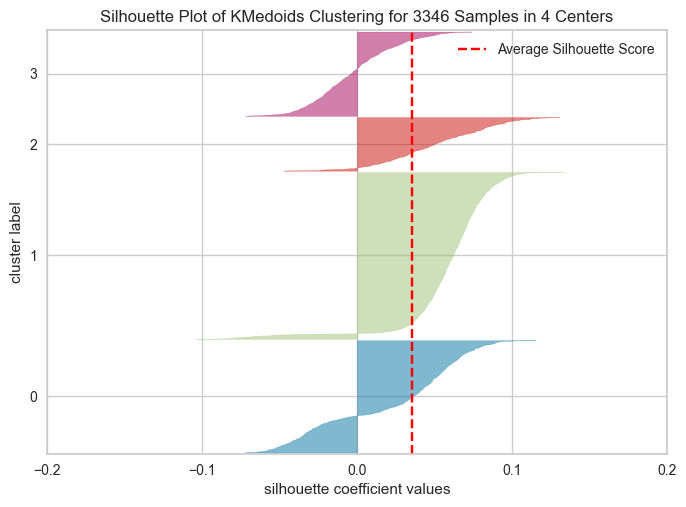

In [16]:
CBC.plot_silhouette(4, KMedoids, data) 

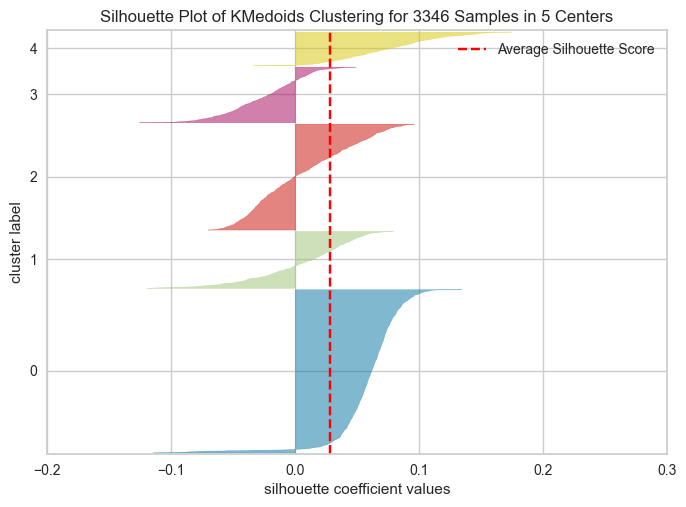

In [17]:
CBC.plot_silhouette(5, KMedoids, data) 

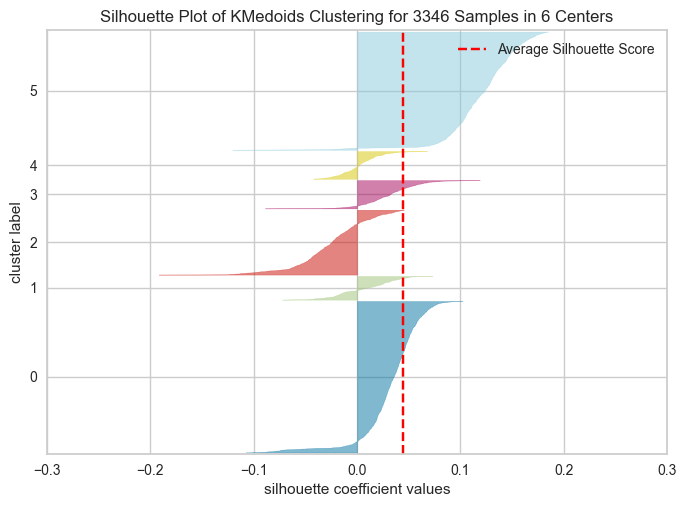

In [18]:
CBC.plot_silhouette(6, KMedoids, data)

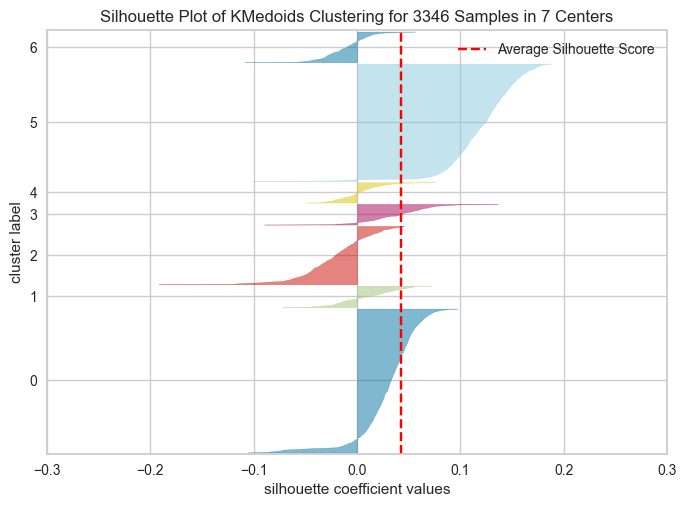

In [19]:
CBC.plot_silhouette(7, KMedoids, data) 

In [24]:
from sklearn.metrics import silhouette_score
def calculate_silhouette_score(model, potential_k, data) -> list:
    """Word
    
    Args:
        model_dkje (pd.DataFrame): diojfijdoi
        oadjfosjdf;l
    
    Return:
        (int): sjdfivjhsfdi
    """
    silhouette_score_result = [] 
    for k in potential_k:
        if model is KMeans:
            model_instance = model(n_clusters = k, n_init = "auto", random_state = 42)
        else:
            model_instance = model(n_clusters = k, random_state = 42) 
        cluster_labels = model_instance.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_score_result.append(silhouette_avg)
    return silhouette_score_result

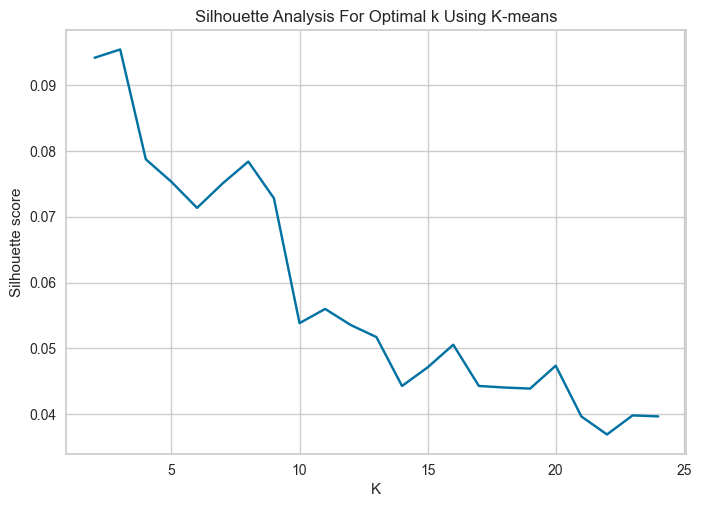

In [28]:
potential_k_range = list(range(2, 25))
silhouette_score_for_ks = calculate_silhouette_score(KMeans, potential_k_range, data)
CBC.plot_silhouette_score(potential_k_range, silhouette_score_for_ks, "K-means")

### Silhouette Analysis for Optimal K

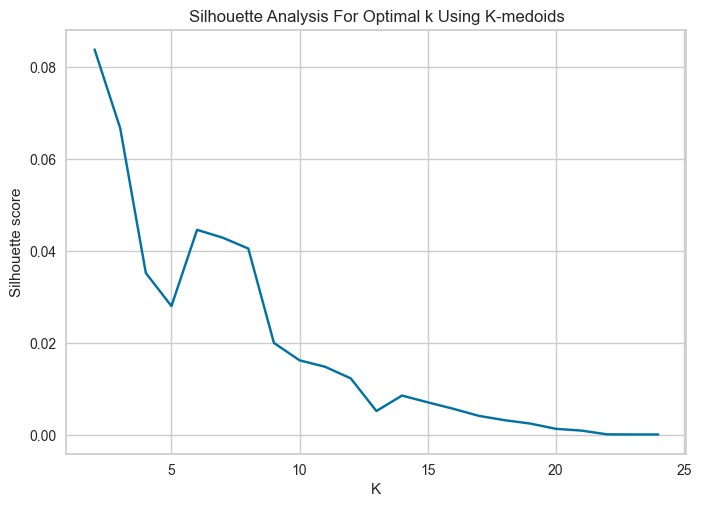

In [27]:
silhouette_score_for_medoids_ks = calculate_silhouette_score(KMedoids, potential_k_range, data)
CBC.plot_silhouette_score(potential_k_range, silhouette_score_for_medoids_ks, "K-medoids")

In [ ]:
##########################################################3
# pca_centers = pca_model.transform(predicted_centers)
# two_components_df["predicted_cluster"] = predicted_labels

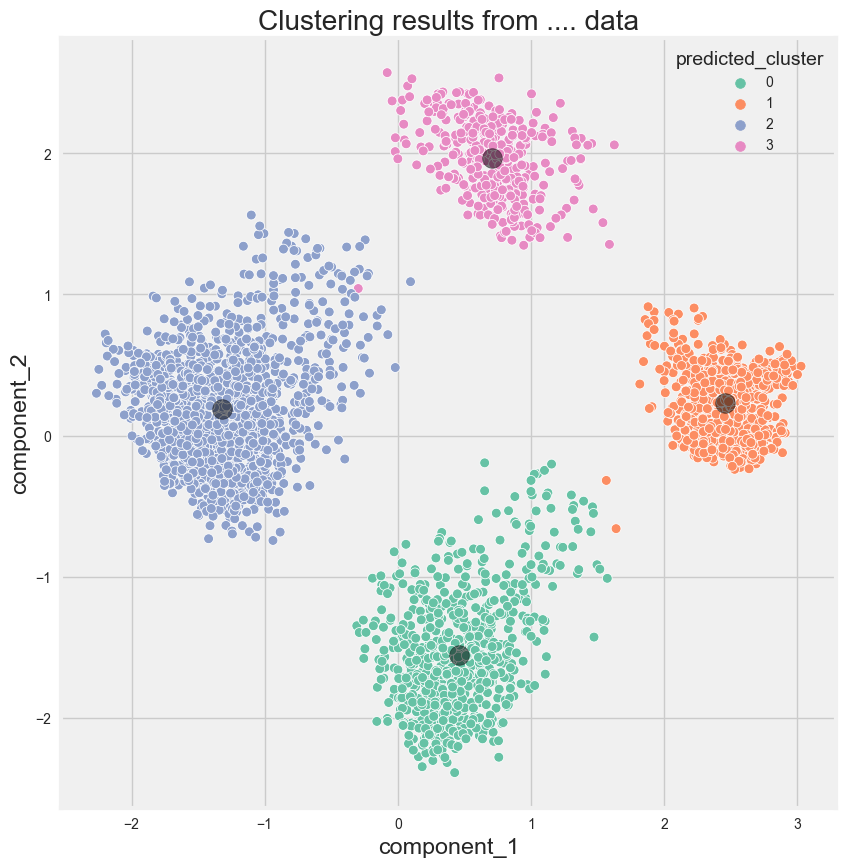

In [ ]:
#plot the data and the centroid for each cluster
plt.figure(figsize=(10, 10))
plt.style.use("fivethirtyeight")
scat = sns.scatterplot(
   x="component_1",
   y="component_2",
   # z="component_3",
   s=50,
   data=two_components_df, 
   hue="predicted_cluster",  
   palette="Set2"
)
 
scat.set_title( "Clustering results from .... data") 
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Training a 7-means model

In [29]:
data_labels = pd.DataFrame()

In [31]:
seven_means_model = KMeans(n_init = 300, n_clusters = 7)
data_labels["7-means"] = seven_means_model.fit_predict(data)

In [32]:
four_means_model = KMeans(n_init = 300, n_clusters = 4)
data_labels["4-means using PCA"] = four_means_model.fit_predict(two_components_df)

In [35]:
six_medoids_model = KMedoids(n_clusters = 6)
data_labels["6-medoids"] = six_medoids_model.fit_predict(data)    

In [36]:
four_medoids_model = KMedoids(n_clusters = 4)
data_labels["4-medoids using PCA"] = four_medoids_model.fit_predict(two_components_df)    

In [37]:
data_labels

,7-means,4-means using PCA,6-medoids,4-medoids using PCA
0,5,2,5,3
1,3,1,0,1
2,6,0,2,2
3,6,0,4,2
4,2,1,2,1
...,...,...,...,...
3341,2,1,0,1
3342,3,1,5,1
3343,6,0,3,2
3344,2,1,1,1


In [38]:
data_labels.to_csv('../data/labels/centered_based_algorithms_labels.csv', index = False)